<a href="https://colab.research.google.com/github/DiAnCaceres/Minor-Machine-Learning/blob/main/Proyecto_ML/Entrega_04_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Proyecto Final - Reconocimiento de Actividad Humana (HAR)


In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
import seaborn as sns
from sklearn.manifold import TSNE

###Entrega 01 - OBTAIN

Incluir todo el código de la Etapa 01 - OBTAIN creada en la semana anterior

In [ ]:
url = "https://drive.google.com/file/d/1Nacn6CvB6xcltzx-_hp5AHw2YkME1iiB/view?usp=share_link" #link del dataset(link hacia .txt que esta in mi gdrive)
url = "https://drive.google.com/uc?id=" + url.split('/')[-2]
dataset = pd.read_csv(url, on_bad_lines='skip', header = None) #se agrego on_bad_lines skip ya que daba error al cargar el dataset
dataset

,0,1,2,3,4,5
0,33,Jogging,49105962326000,-0.694638,12.680544,0.50395286;
1,33,Jogging,49106062271000,5.012288,11.264028,0.95342433;
2,33,Jogging,49106112167000,4.903325,10.882658,-0.08172209;
3,33,Jogging,49106222305000,-0.612916,18.496431,3.0237172;
4,33,Jogging,49106332290000,-1.184970,12.108489,7.205164;
...,...,...,...,...,...,...
1086461,19,Sitting,131623331483000,9.000000,-1.570000,1.69;
1086462,19,Sitting,131623371431000,9.040000,-1.460000,1.73;
1086463,19,Sitting,131623411592000,9.080000,-1.380000,1.69;
1086464,19,Sitting,131623491487000,9.000000,-1.460000,1.73;


###Entrega 02 - SCRUB

Eliminar filas con datos faltantes

*Uno de los pasos iniciales en la limpieza de datos consiste en eliminar aquellas filas que contengan datos faltantes. Estas líneas generalmente no aportan información y pueden complicar la etapa de entrenamiento y validación de muchos modelos predictivos.*


In [ ]:
dataset.isnull().sum()

0    0
1    0
2    0
3    0
4    0
5    1
dtype: int64

In [ ]:
dataset = dataset.dropna(how='any',axis=0) 
dataset.isnull().sum()

0    0
1    0
2    0
3    0
4    0
5    0
dtype: int64

Agregar al DataFrame los nombres de las columnas 

*En ocasiones al crear los data frames el sistema asigna nombres genéricos y correlativos a las columnas. Es recomendable renombrar las columnas por nombres significativos para favorecer el análisis posterior de los datos.*

In [ ]:
dataset.columns = ["user", "activity", "time", "x", "y", "z"]


de la manera que se importo el dataset, quedaron punto y comas en la columna z por lo que se deben quitar

In [ ]:
dataset["z"] = dataset["z"].str.replace(";", "")

C:\Users\dianc\AppData\Local\Temp\ipykernel_7648\3918082075.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["z"] = dataset["z"].str.replace(";", "")


Visualizar las 5 primeras filas del DataFrame (.head())

*Siempre es buena medida visualizar algunas líneas del dataframe para tener una idea concreta del contenido.*


In [ ]:
dataset.head()

,user,activity,time,x,y,z
0,33,Jogging,49105962326000,-0.694638,12.680544,0.50395286
1,33,Jogging,49106062271000,5.012288,11.264028,0.95342433
2,33,Jogging,49106112167000,4.903325,10.882658,-0.08172209
3,33,Jogging,49106222305000,-0.612916,18.496431,3.0237172
4,33,Jogging,49106332290000,-1.184970,12.108489,7.205164


Buscar datos nulos y eliminarlos si es que existen

In [ ]:
#se realizo al principio de la entrega 2

Visualizar los tipo de datos a los que pertenece cada columna (.info())

*Es necesario tener un detalle de cuantas variables están considerando y el tipo de datos que pertenecen para verificar si es posible utilizarla directamente para el modelo predictivo o si es necesario realizar una transformación del tipo de dato.*


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1086465 entries, 0 to 1086465
Data columns (total 6 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   user      1086465 non-null  int64  
 1   activity  1086465 non-null  object 
 2   time      1086465 non-null  int64  
 3   x         1086465 non-null  float64
 4   y         1086465 non-null  float64
 5   z         1086465 non-null  object 
dtypes: float64(2), int64(2), object(2)
memory usage: 58.0+ MB


Cambiar el tipo de datos de las variables predictoras a valores reales, para realizar la clasificación 

*Muchas de las variables contenidas en el DataFrame originalmente se encuentran en el tipo de dato 'object'. En ese formato las variables no pueden ser interpretadas como vectores. Recordemos que la mayoría de los modelos de Machine Learning estudiados operan en el espacio vectorial. Por esta razón las variables que formarán parte del modelo predictivo deben ser transformadas a un formato numérico como 'Float' o 'integer'.*

Para este proyecto en particular se pide transformar  al tipo de dato Float, las variables del acelerómetro en el eje $x$, $y$ y $z$



In [ ]:
dataset["z"] = dataset["z"].astype(float)

C:\Users\dianc\AppData\Local\Temp\ipykernel_7648\3283671052.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["z"] = dataset["z"].astype(float)


Imprimir los tipos de datos de las variables del DataFrame

*Se recomienda volver a ejecutar el comando info para verificar que efectivamente las variables cambiaron su tipo de dato y que ahora se pueden procesar con los modelos predictivos.*


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1086465 entries, 0 to 1086465
Data columns (total 6 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   user      1086465 non-null  int64  
 1   activity  1086465 non-null  object 
 2   time      1086465 non-null  int64  
 3   x         1086465 non-null  float64
 4   y         1086465 non-null  float64
 5   z         1086465 non-null  float64
dtypes: float64(3), int64(2), object(1)
memory usage: 58.0+ MB


Eliminar las columnas que no se utilizaran para la clasificación

*En este caso deberíamos conservar la actividad respectiva y las variables asociadas al acelerómetro*


In [ ]:
df = dataset.drop(["user" ,"time"],axis=1)
df

,activity,x,y,z
0,Jogging,-0.694638,12.680544,0.503953
1,Jogging,5.012288,11.264028,0.953424
2,Jogging,4.903325,10.882658,-0.081722
3,Jogging,-0.612916,18.496431,3.023717
4,Jogging,-1.184970,12.108489,7.205164
...,...,...,...,...
1086461,Sitting,9.000000,-1.570000,1.690000
1086462,Sitting,9.040000,-1.460000,1.730000
1086463,Sitting,9.080000,-1.380000,1.690000
1086464,Sitting,9.000000,-1.460000,1.730000


Utilizar el comando *value_counts* para obtener un detalle de cuantas instancias se tienen por actividad. El objetivo consiste en identificar la presencia del balance o desbalance en las categorías a modelar


In [ ]:
df.value_counts("activity")

activity
Walking       418393
Jogging       336445
Upstairs      122869
Downstairs    100425
Sitting        59939
Standing       48394
dtype: int64

Este proyecto considera datos con un desbalance de clases. Es necesario balancearlos para que los modelos operen de manera adecuada. Existen muchas maneras de realizar un balance, pero en este proyecto utilizaremos una estrategia sencilla e intuitiva. Simplemente debe identificar la actividad que contenga el número menor de instancias. Se debe realizar un muestreo para las otras actividades utilizando ese valor. De esta manera todas las clases tendrán la misma cantidad de instancias. 



In [ ]:
g = df.groupby('activity') #se separan en grupos de actividades
min = g.size().min() #se obtiene el valor minimo del tamaño de los grupos
Walking = g.get_group("Walking").head(min) #se obtiene el grupo especifico y solo se ocupan los primeros n datos, donde n es la minima catidad de datos
Jogging = g.get_group("Jogging").head(min)
Upstairs = g.get_group("Upstairs").head(min)
Downstairs = g.get_group("Downstairs").head(min)
Sitting = g.get_group("Sitting").head(min)
Standing = g.get_group("Standing").head(min)
df_ds= pd.concat([Walking, Jogging, Upstairs, Downstairs, Sitting, Standing]) # se concatenan todas los grupos para volver a formar el dataframe ya con downsampling

Establecer el número de instancias y dimensiones del data frame resultante *(shape)*


In [ ]:
df_ds.shape

(290364, 4)

Volver a imprimir la cantidad de instancias por categoría para verificar que todo esté en orden. *(value_counts)*

In [ ]:
df_ds.value_counts("activity") #se comprueba si se tuvo exito

activity
Downstairs    48394
Jogging       48394
Sitting       48394
Standing      48394
Upstairs      48394
Walking       48394
dtype: int64

Volver a visualizar las cinco primeras líneas del DataFrame para revisar que todo esté en orden *(head)*


In [ ]:
df_ds.head(5)

,activity,x,y,z
597,Walking,0.844462,8.008764,2.792171
598,Walking,1.116869,8.621680,3.786457
599,Walking,-0.503953,16.657684,1.307553
600,Walking,4.794363,10.760075,-1.184970
601,Walking,-0.040861,9.234595,-0.694638


Separar las variables predictoras (X) de las ctegorias o etiquetas (y)

In [ ]:
X = df_ds.iloc[:,1:] #se toman todos los datos a la derecha de la primera columna
y = df_ds.iloc[:,:1] #se toma solo la primera columna

In [ ]:
X

,x,y,z
597,0.844462,8.008764,2.792171
598,1.116869,8.621680,3.786457
599,-0.503953,16.657684,1.307553
600,4.794363,10.760075,-1.184970
601,-0.040861,9.234595,-0.694638
...,...,...,...
1083927,-4.990000,8.390000,-0.380000
1083928,-5.130000,8.240000,-0.420000
1083929,-4.560000,8.500000,-0.890000
1083930,-4.480000,8.540000,-1.080000


In [ ]:
y

,activity
597,Walking
598,Walking
599,Walking
600,Walking
601,Walking
...,...
1083927,Standing
1083928,Standing
1083929,Standing
1083930,Standing


Estandarizar los datos numericos (*StandardScaler)*

*Para el caso de la estandarización de los datos se pueden usar distintas técnicas, como la normalización 01, estandarización entre -1 y 1 o el denominado Z-Score. En este caso usaremos la función Standard Scaler de Python con sus valores por defecto.*


In [ ]:
sc = StandardScaler()
X = sc.fit_transform(X)
X

array([[-0.03449447,  0.0769677 ,  0.2664932 ],
       [ 0.01727895,  0.18754729,  0.49575718],
       [-0.29077293,  1.63736749, -0.07583245],
       ...,
       [-1.06166167,  0.16559432, -0.58254798],
       [-1.04645694,  0.17281094, -0.62635849],
       [-1.13388413,  0.1259029 , -0.57101889]])

Como último paso debe reconstruir el dataframe pegando las columnas de los variables predicadores (X) y las categorías (y)


In [ ]:
X = pd.DataFrame(X, columns = ["x","y","z"]) # se debe pasar de un arreglo en np a dataframe
X

,x,y,z
0,-0.034494,0.076968,0.266493
1,0.017279,0.187547,0.495757
2,-0.290773,1.637367,-0.075832
3,0.716220,0.573347,-0.650563
4,-0.202758,0.298127,-0.537501
...,...,...,...
290359,-1.143387,0.145749,-0.464951
290360,-1.169995,0.118686,-0.474175
290361,-1.061662,0.165594,-0.582548
290362,-1.046457,0.172811,-0.626358


In [ ]:
df_merge = pd.DataFrame(np.column_stack([y,X]))
df_merge.columns = ["activity","x","y","z"]
df_merge

,activity,x,y,z
0,Walking,-0.034494,0.076968,0.266493
1,Walking,0.017279,0.187547,0.495757
2,Walking,-0.290773,1.637367,-0.075832
3,Walking,0.71622,0.573347,-0.650563
4,Walking,-0.202758,0.298127,-0.537501
...,...,...,...,...
290359,Standing,-1.143387,0.145749,-0.464951
290360,Standing,-1.169995,0.118686,-0.474175
290361,Standing,-1.061662,0.165594,-0.582548
290362,Standing,-1.046457,0.172811,-0.626358


In [ ]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290364 entries, 0 to 290363
Data columns (total 4 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   activity  290364 non-null  object
 1   x         290364 non-null  object
 2   y         290364 non-null  object
 3   z         290364 non-null  object
dtypes: object(4)
memory usage: 8.9+ MB


In [ ]:
#convert x, y, z to float
df_merge["x"] = df_merge["x"].astype(float)
df_merge["y"] = df_merge["y"].astype(float)
df_merge["z"] = df_merge["z"].astype(float)
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290364 entries, 0 to 290363
Data columns (total 4 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   activity  290364 non-null  object 
 1   x         290364 non-null  float64
 2   y         290364 non-null  float64
 3   z         290364 non-null  float64
dtypes: float64(3), object(1)
memory usage: 8.9+ MB


In [ ]:
#provoca un error con el downsampling por lo que se cambio por el codigo de arriba
#df_merge = y.merge(X ,left_index=True,right_index=True) #se realiza un merge de los dataframe y , X
#df_merge

# Entrega 03 - EXPLORE

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


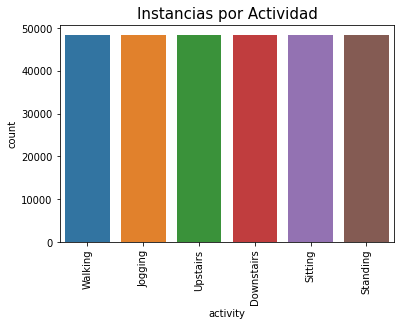

In [ ]:
plt.title('Instancias por Actividad', fontsize=15)
sns.countplot(df_merge.activity)
plt.xticks(rotation=90)
plt.show()

Al mostrar las instancias por actividad se detecto que habia un problema con el balanceo de datos que se hizo anteriormente.

Despues de hacer el balanceo estaba todo bien hasta que se realizaba el join final y se volvia a desbalancear. Debido a esto se cambio la forma en la que se realiza el merge en las ultimas etapas de la entrega anterior

In [ ]:
df_merge.activity.value_counts()

Walking       48394
Jogging       48394
Upstairs      48394
Downstairs    48394
Sitting       48394
Standing      48394
Name: activity, dtype: int64

(array([  623.,  1324.,  6026., 31636., 98890., 80140., 43529., 16675.,
         5292.,  6229.]),
 array([-3.9220513917281146, -3.177399768195525, -2.432748144662935,
        -1.688096521130345, -0.9434448975977552, -0.19879327406516545,
        0.5458583494674247, 1.290509973000014, 2.035161596532604,
        2.7798132200651944, 3.524464843597784], dtype=object),
 <BarContainer object of 10 artists>)

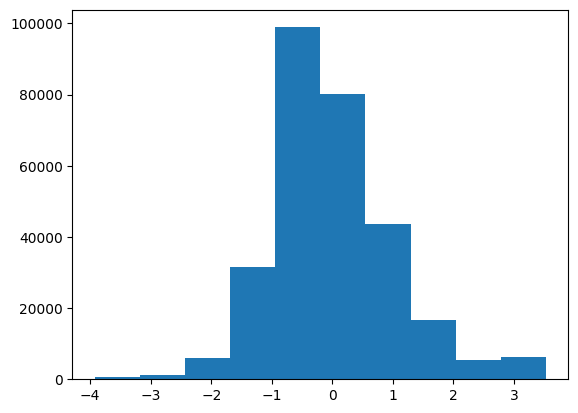

In [ ]:
plt.hist(df_merge.x)

(array([   255.,    411.,   1143.,   3319.,  20716.,  48908.,  57412.,
        103998.,  31479.,  22723.]),
 array([-4.9058872007689915, -4.198974997058318, -3.492062793347645,
        -2.7851505896369724, -2.078238385926299, -1.371326182215626,
        -0.6644139785049532, 0.04249822520572, 0.7494104289163932,
        1.4563226326270664, 2.1632348363377396], dtype=object),
 <a list of 10 Patch objects>)

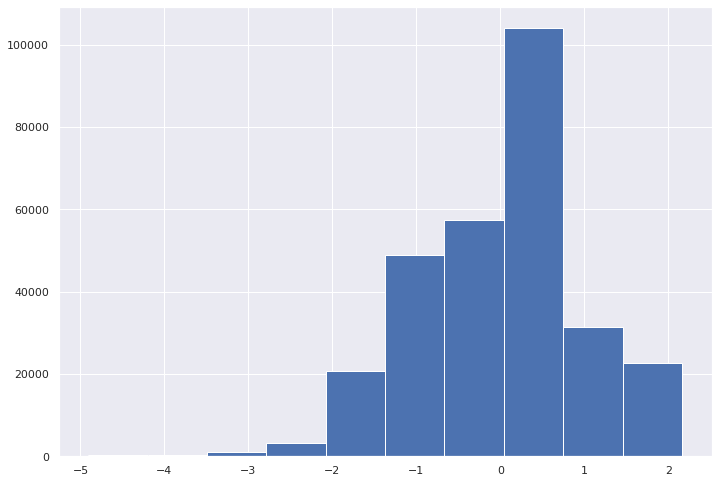

In [ ]:
plt.hist(df_merge.y)

(array([   227.,   1376.,   3452.,  17721.,  88534., 105116.,  33672.,
         36929.,   2825.,    512.]),
 array([-4.739627146118217, -3.8618287263973223, -2.984030306676428,
        -2.106231886955533, -1.2284334672346389, -0.3506350475137445,
        0.5271633722071503, 1.4049617919280442, 2.282760211648939,
        3.1605586313698337, 4.0383570510907285], dtype=object),
 <a list of 10 Patch objects>)

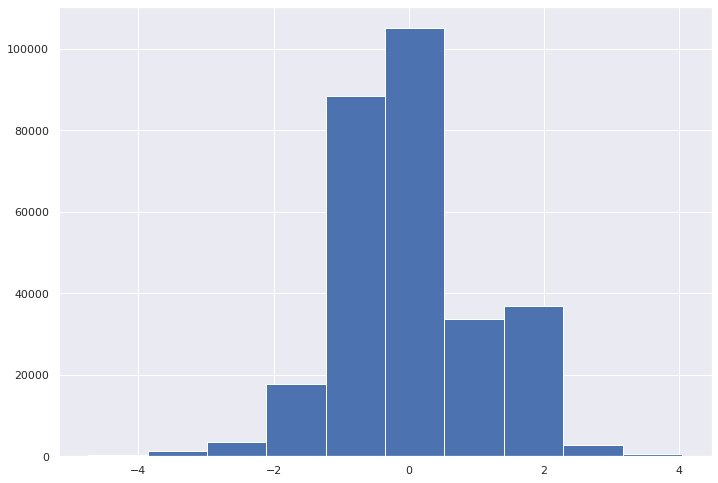

In [ ]:
plt.hist(df_merge.z)

Se realiza un histograma para cada eje y separando cada actividad.

En el siguiente grafico se pueden ver los valores del eje x y lo que se puede recalcar es que se podria usar como indicador para cuando se quiera saber si la actividad es sitting, ya que si se registran varios datos que esten dentro del rango [0,2] hay una alta posibilidad de que corresponda a sitting

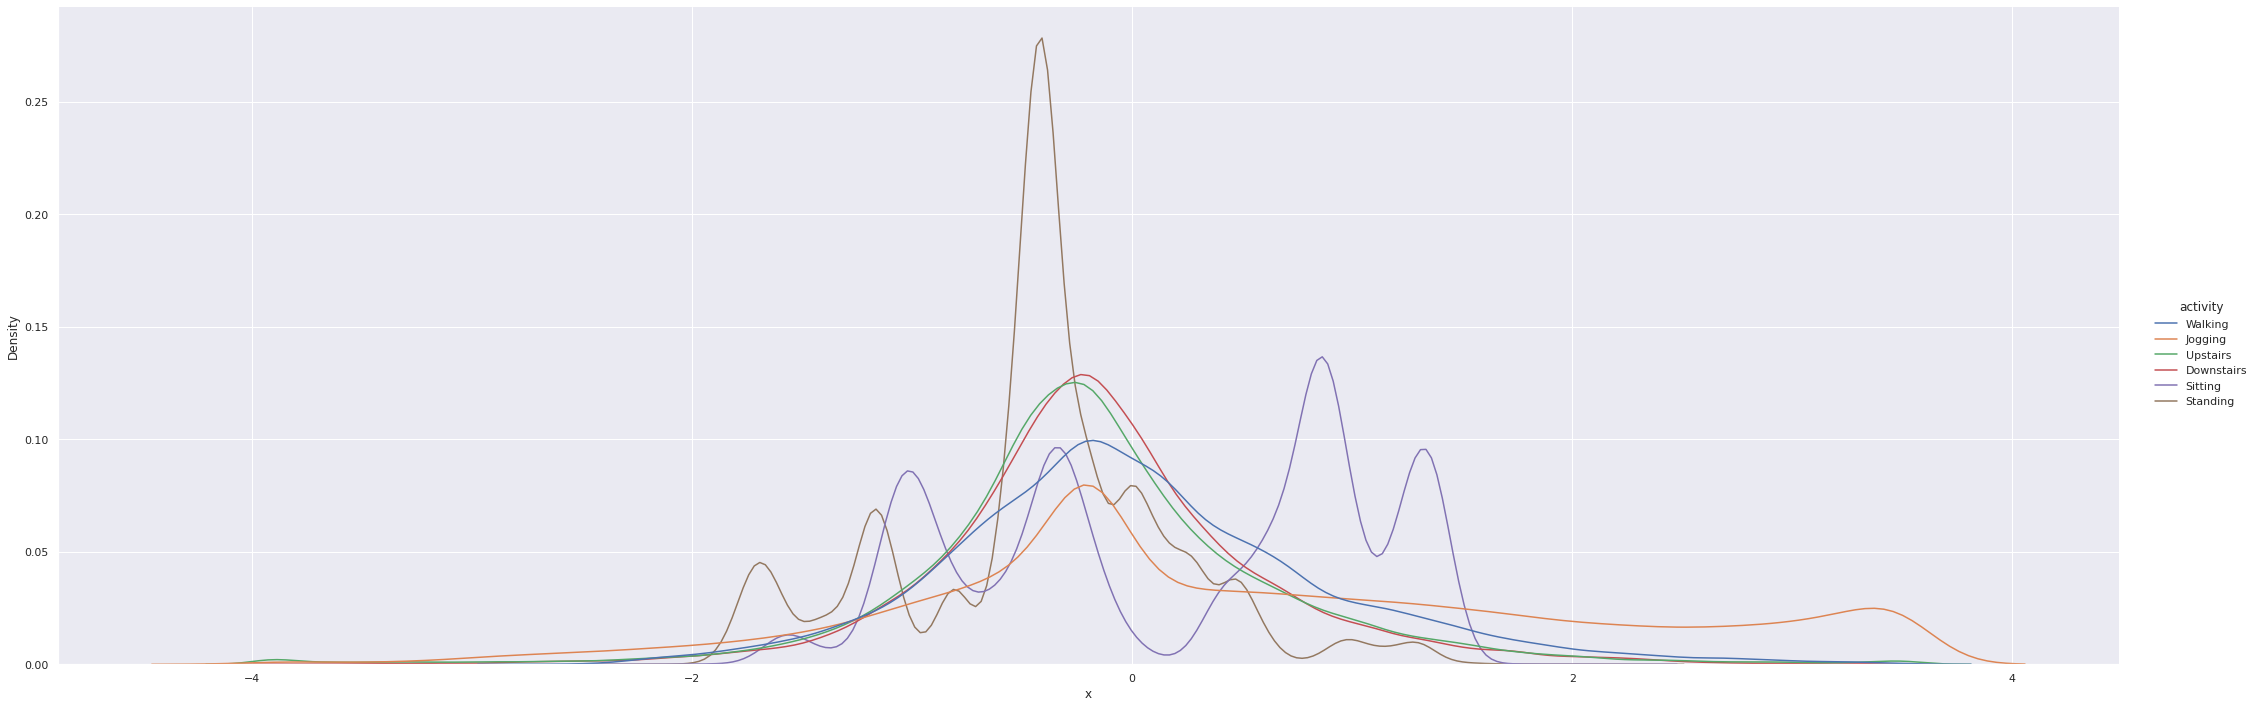

In [ ]:
sns.displot(df_merge, color="red", x="x",hue="activity", kind="kde", aspect=3, height=10, )

Siguiendo la misma logica anterior, se puede observar la gran concentracion de datos de standing que estan en el rango [0, 0.5] aunque varias otras actividades tienen un valor cercano solo que en menor densidad.

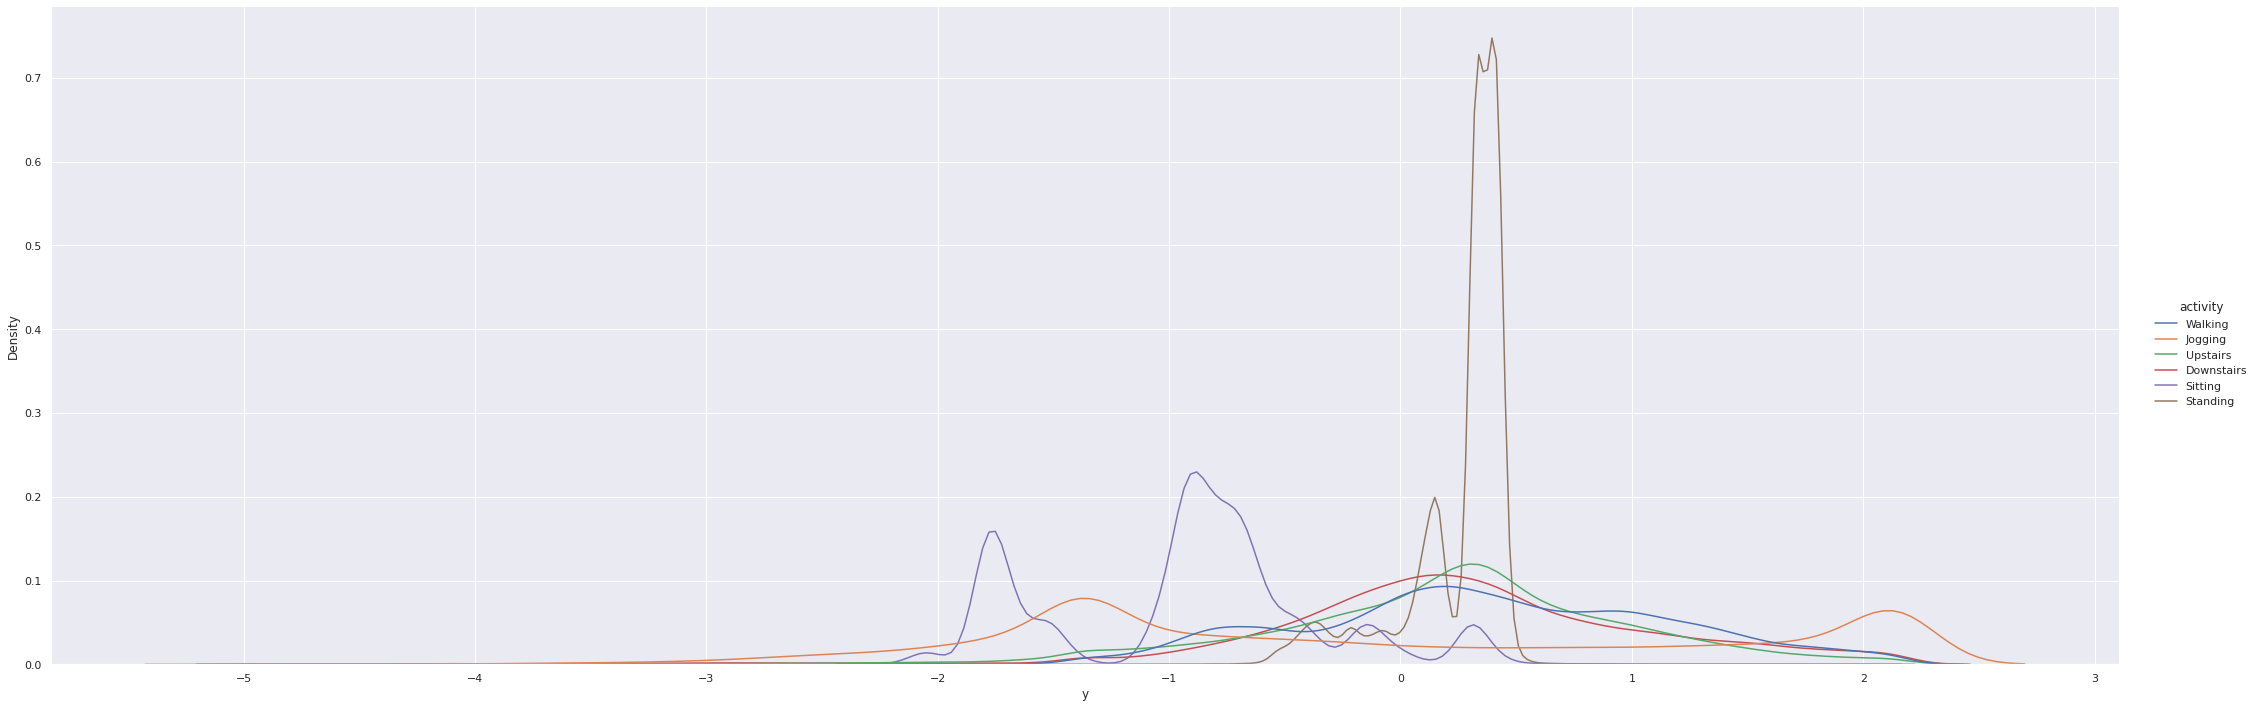

In [ ]:
sns.displot(df_merge, color="red", x="y",hue="activity", kind="kde", aspect=3, height=10, )

Se puede observar nuevamente que los valores de los sensores en el eje z tienen un valor que se diferencian del resto para la activida sitting

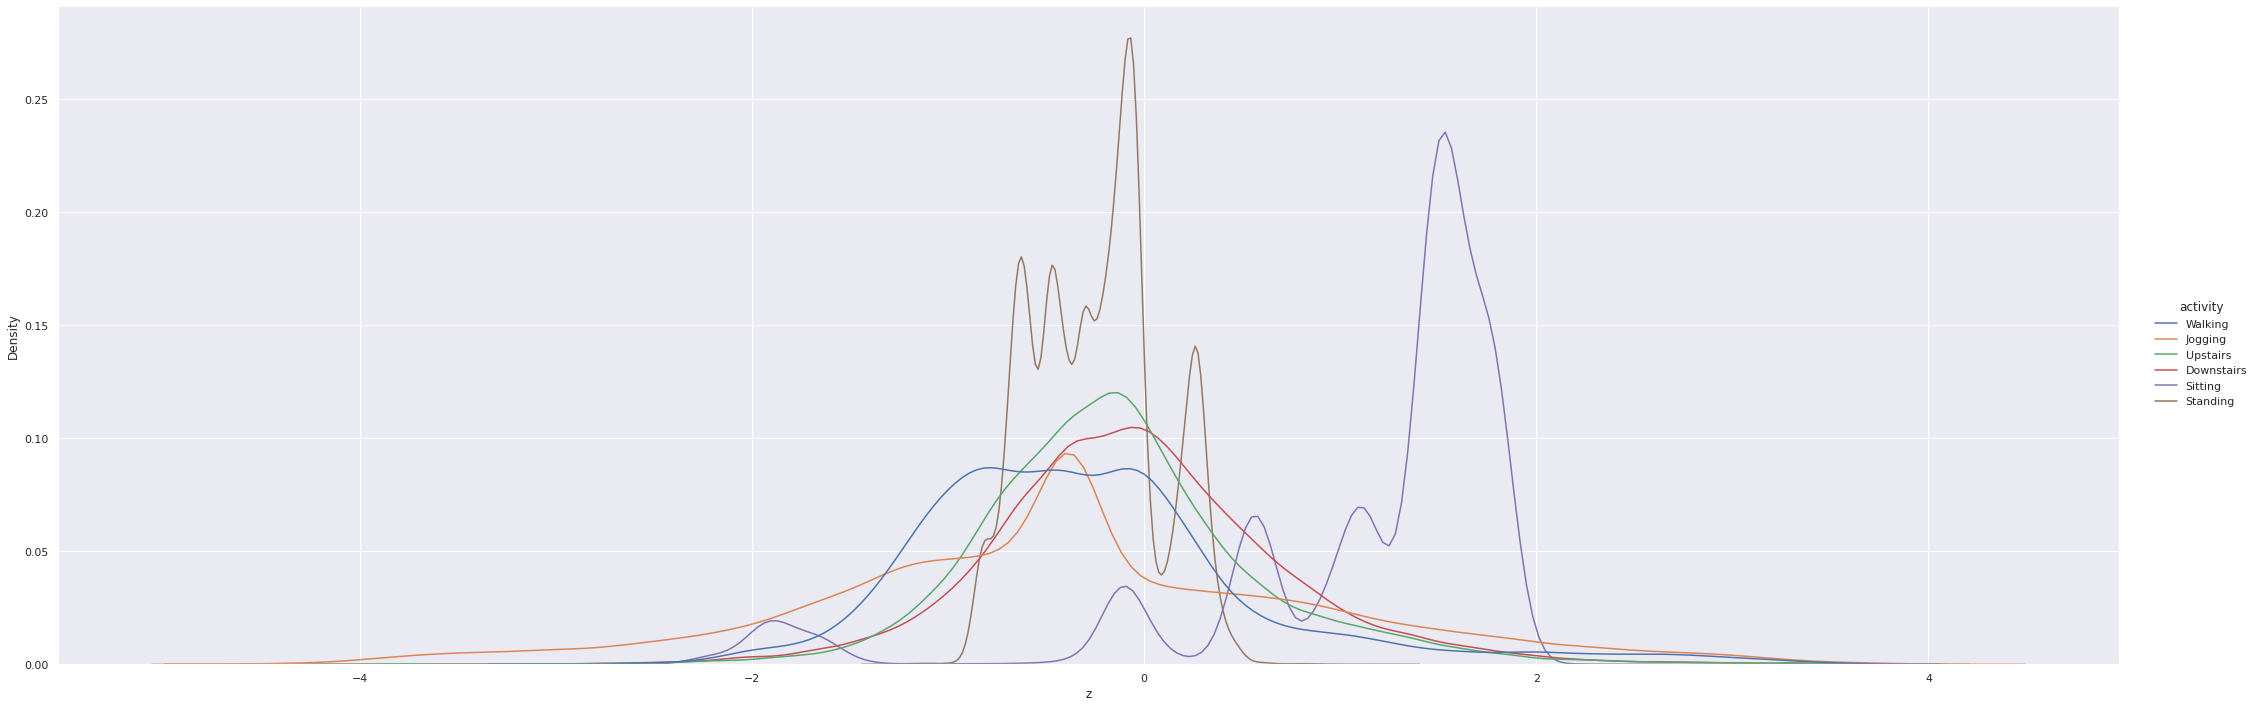

In [ ]:
sns.displot(df_merge, color="red", x="z",hue="activity", kind="kde", aspect=3, height=10, )

Que pasa si graficamos los datos de los ejes de cada actividad? como se realizo un muestra secuencial, si se grafican los valores de los sensores se obtendra una linea de tiempo que muestra los valores de que tomo cada sensor a lo largo de un periodo de tiempo determinado por la cantidad de muestras que se quieran graficar.

Se van a utilizar los dataframes ya separados anteriormente por actividades

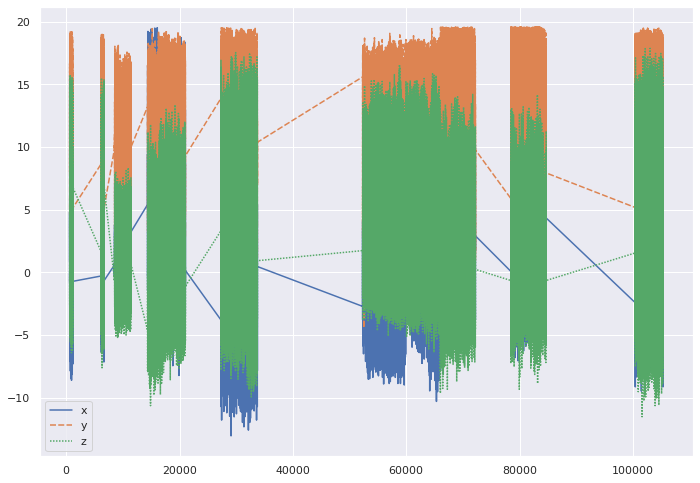

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.lineplot(data=Walking)

No se distingue mucho por que hay muchos datos.
Se van a ocupar los primero 100 datos para hacer los graficos mas facil de visualizar.

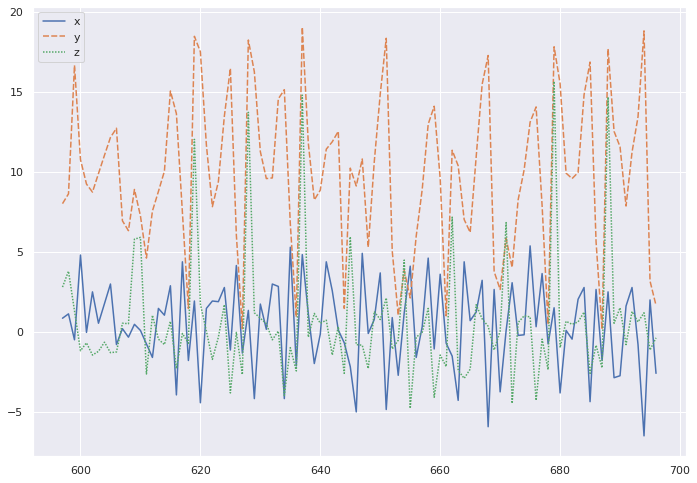

In [ ]:
sns.lineplot(data=Walking[:100])

AHora si se distingue un poco mas.
Podemos observar que el caos en los sensores.
podemos deducir que los graficos para las actividades con movimiento van a ser de forma similar a este y el caos en el grafico va a depender de la intensidad de la actividad.

por otro lado para las actividades sin movimiento se espera unas lineas mas estables

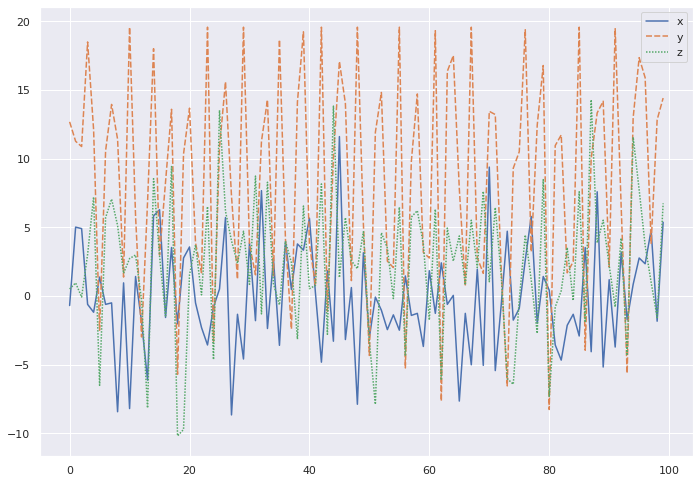

In [ ]:
sns.lineplot(data=Jogging[:100])

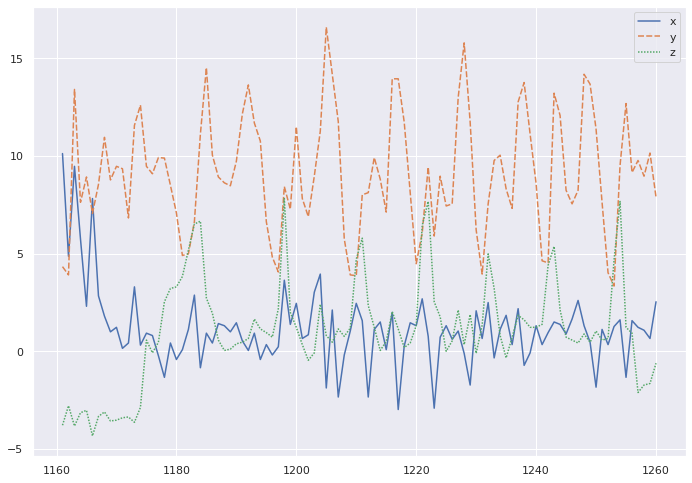

In [ ]:
sns.lineplot(data=Upstairs[:100])

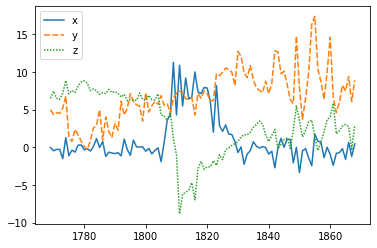

In [ ]:
sns.lineplot(data=Downstairs[:100])

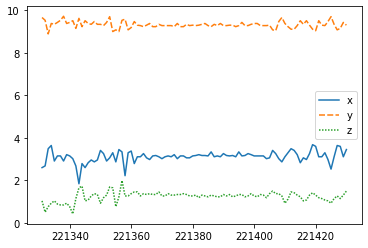

In [ ]:

sns.lineplot(data=Sitting[:100])

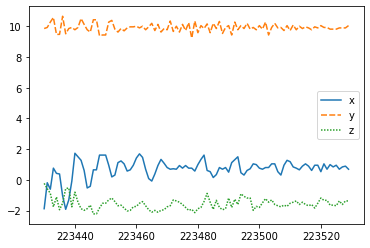

In [ ]:
sns.lineplot(data=Standing[:100])

Como se muestra en los graficos, los graficos de las ultimas dos actividades son completamente diferentes de las anteriores lo que puede se un buen identificador para distinguir las actividades con moviento y sin movimiento

In [ ]:
X_col = df_merge[["x","y","z"]]
X_col

,x,y,z
0,-0.034494,0.076968,0.266493
1,0.017279,0.187547,0.495757
2,-0.290773,1.637367,-0.075832
3,0.716220,0.573347,-0.650563
4,-0.202758,0.298127,-0.537501
...,...,...,...
290359,-1.143387,0.145749,-0.464951
290360,-1.169995,0.118686,-0.474175
290361,-1.061662,0.165594,-0.582548
290362,-1.046457,0.172811,-0.626358


In [ ]:
y_col = df_merge[["activity"]]


In [ ]:
#al preparar los datos para seaborn en las columnas siguientes me arrojaba un error en por que los labels tenian una dimension de mas por lo que se paso a 
# un arreglo de 1 dimension
y_col = y_col.to_numpy()
y_col

array([['Walking'],
       ['Walking'],
       ['Walking'],
       ...,
       ['Standing'],
       ['Standing'],
       ['Standing']], dtype=object)

In [ ]:
y_col = y_col.reshape(1,-1)[0]
y_col

array(['Walking', 'Walking', 'Walking', ..., 'Standing', 'Standing',
       'Standing'], dtype=object)

In [ ]:
# realiza t-sne con diferentes valores de perplejidad y sus respectivas tramas..
def perform_tsne(X_data, y_data, perplexities, n_iter=1000, img_name_prefix='t-sne'):
        
    for index,perplexity in enumerate(perplexities):
        # realizar t-sne
        print('\nperforming tsne with perplexity {} and with {} iterations at max'.format(perplexity, n_iter))
        X_reduced = TSNE(verbose=2, perplexity=perplexity, n_jobs=-1).fit_transform(X_data)
        print('Done..')
        
        # preparar los datos para seaborn         
        print('Creating plot for this t-sne visualization..')
        df = pd.DataFrame({'x':X_reduced[:,0], 'y':X_reduced[:,1] ,'label':y_data})
        
        # dibujar la trama en el lugar apropiado en la cuadrícula
        sns.lmplot(data=df, x='x', y='y', hue='label', fit_reg=False, palette="Set1",markers=['^','v','s','o', '1','2'])
        plt.title("perplexity : {} and max_iter : {}".format(perplexity, n_iter))
        img_name = img_name_prefix + '_perp_{}_iter_{}.png'.format(perplexity, n_iter)
        print('saving this plot as image in present working directory...')
        plt.savefig(img_name)
        plt.show()
        print('Done')

Se realizo t-sne pero a simple vista no se puede notar un patron muy marcado aparte de que los datos de sitting parecen estar en los bordes


performing tsne with perplexity 2 and with 1000 iterations at max
[t-SNE] Computing 7 nearest neighbors...


c:\Users\dianc\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\dianc\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Indexed 290364 samples in 0.198s...
[t-SNE] Computed neighbors for 290364 samples in 1.466s...
[t-SNE] Computed conditional probabilities for sample 1000 / 290364
[t-SNE] Computed conditional probabilities for sample 2000 / 290364
[t-SNE] Computed conditional probabilities for sample 3000 / 290364
[t-SNE] Computed conditional probabilities for sample 4000 / 290364
[t-SNE] Computed conditional probabilities for sample 5000 / 290364
[t-SNE] Computed conditional probabilities for sample 6000 / 290364
[t-SNE] Computed conditional probabilities for sample 7000 / 290364
[t-SNE] Computed conditional probabilities for sample 8000 / 290364
[t-SNE] Computed conditional probabilities for sample 9000 / 290364
[t-SNE] Computed conditional probabilities for sample 10000 / 290364
[t-SNE] Computed conditional probabilities for sample 11000 / 290364
[t-SNE] Computed conditional probabilities for sample 12000 / 290364
[t-SNE] Computed conditional probabilities for sample 13000 / 290364
[t-SNE] C

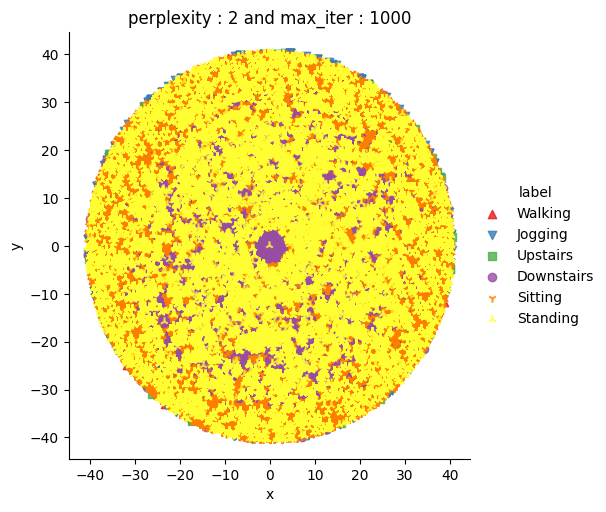

Done

performing tsne with perplexity 5 and with 1000 iterations at max
[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 290364 samples in 0.206s...


c:\Users\dianc\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\dianc\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computed neighbors for 290364 samples in 1.790s...
[t-SNE] Computed conditional probabilities for sample 1000 / 290364
[t-SNE] Computed conditional probabilities for sample 2000 / 290364
[t-SNE] Computed conditional probabilities for sample 3000 / 290364
[t-SNE] Computed conditional probabilities for sample 4000 / 290364
[t-SNE] Computed conditional probabilities for sample 5000 / 290364
[t-SNE] Computed conditional probabilities for sample 6000 / 290364
[t-SNE] Computed conditional probabilities for sample 7000 / 290364
[t-SNE] Computed conditional probabilities for sample 8000 / 290364
[t-SNE] Computed conditional probabilities for sample 9000 / 290364
[t-SNE] Computed conditional probabilities for sample 10000 / 290364
[t-SNE] Computed conditional probabilities for sample 11000 / 290364
[t-SNE] Computed conditional probabilities for sample 12000 / 290364
[t-SNE] Computed conditional probabilities for sample 13000 / 290364
[t-SNE] Computed conditional probabilities for sample

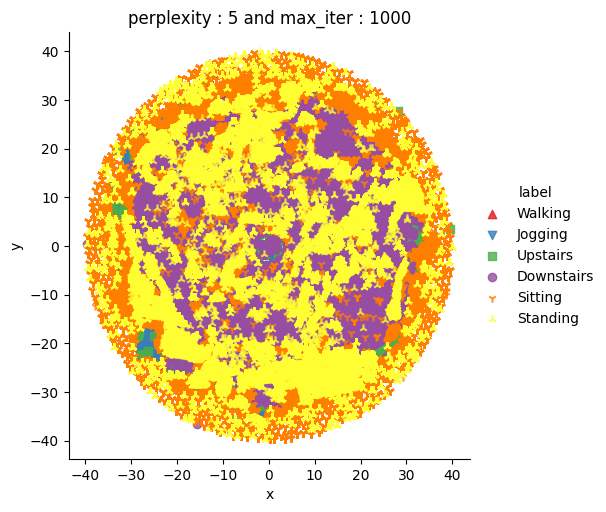

Done

performing tsne with perplexity 10 and with 1000 iterations at max
[t-SNE] Computing 31 nearest neighbors...


c:\Users\dianc\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\dianc\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Indexed 290364 samples in 0.220s...
[t-SNE] Computed neighbors for 290364 samples in 2.480s...
[t-SNE] Computed conditional probabilities for sample 1000 / 290364
[t-SNE] Computed conditional probabilities for sample 2000 / 290364
[t-SNE] Computed conditional probabilities for sample 3000 / 290364
[t-SNE] Computed conditional probabilities for sample 4000 / 290364
[t-SNE] Computed conditional probabilities for sample 5000 / 290364
[t-SNE] Computed conditional probabilities for sample 6000 / 290364
[t-SNE] Computed conditional probabilities for sample 7000 / 290364
[t-SNE] Computed conditional probabilities for sample 8000 / 290364
[t-SNE] Computed conditional probabilities for sample 9000 / 290364
[t-SNE] Computed conditional probabilities for sample 10000 / 290364
[t-SNE] Computed conditional probabilities for sample 11000 / 290364
[t-SNE] Computed conditional probabilities for sample 12000 / 290364
[t-SNE] Computed conditional probabilities for sample 13000 / 290364
[t-SNE] C

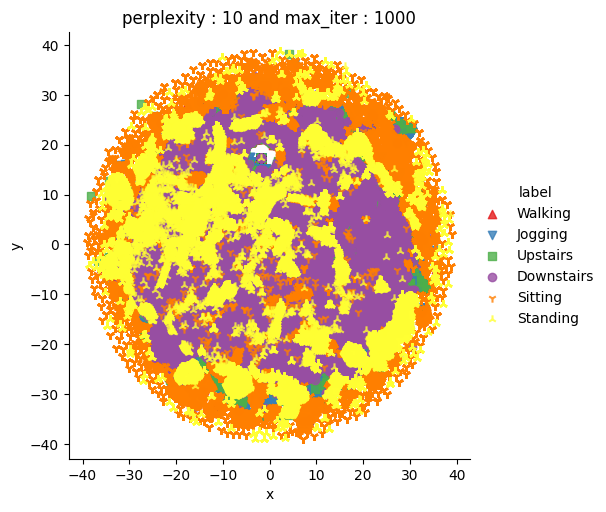

Done

performing tsne with perplexity 20 and with 1000 iterations at max
[t-SNE] Computing 61 nearest neighbors...


c:\Users\dianc\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\dianc\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Indexed 290364 samples in 0.221s...
[t-SNE] Computed neighbors for 290364 samples in 3.523s...
[t-SNE] Computed conditional probabilities for sample 1000 / 290364
[t-SNE] Computed conditional probabilities for sample 2000 / 290364
[t-SNE] Computed conditional probabilities for sample 3000 / 290364
[t-SNE] Computed conditional probabilities for sample 4000 / 290364
[t-SNE] Computed conditional probabilities for sample 5000 / 290364
[t-SNE] Computed conditional probabilities for sample 6000 / 290364
[t-SNE] Computed conditional probabilities for sample 7000 / 290364
[t-SNE] Computed conditional probabilities for sample 8000 / 290364
[t-SNE] Computed conditional probabilities for sample 9000 / 290364
[t-SNE] Computed conditional probabilities for sample 10000 / 290364
[t-SNE] Computed conditional probabilities for sample 11000 / 290364
[t-SNE] Computed conditional probabilities for sample 12000 / 290364
[t-SNE] Computed conditional probabilities for sample 13000 / 290364
[t-SNE] C

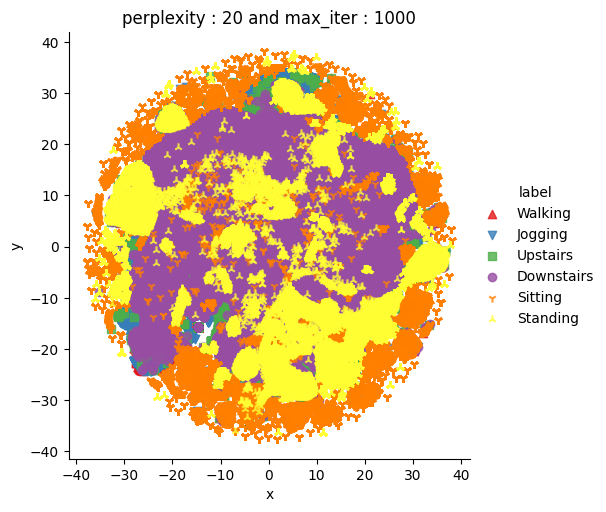

Done

performing tsne with perplexity 50 and with 1000 iterations at max
[t-SNE] Computing 151 nearest neighbors...


c:\Users\dianc\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\dianc\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Indexed 290364 samples in 0.209s...
[t-SNE] Computed neighbors for 290364 samples in 6.708s...
[t-SNE] Computed conditional probabilities for sample 1000 / 290364
[t-SNE] Computed conditional probabilities for sample 2000 / 290364
[t-SNE] Computed conditional probabilities for sample 3000 / 290364
[t-SNE] Computed conditional probabilities for sample 4000 / 290364
[t-SNE] Computed conditional probabilities for sample 5000 / 290364
[t-SNE] Computed conditional probabilities for sample 6000 / 290364
[t-SNE] Computed conditional probabilities for sample 7000 / 290364
[t-SNE] Computed conditional probabilities for sample 8000 / 290364
[t-SNE] Computed conditional probabilities for sample 9000 / 290364
[t-SNE] Computed conditional probabilities for sample 10000 / 290364
[t-SNE] Computed conditional probabilities for sample 11000 / 290364
[t-SNE] Computed conditional probabilities for sample 12000 / 290364
[t-SNE] Computed conditional probabilities for sample 13000 / 290364
[t-SNE] C

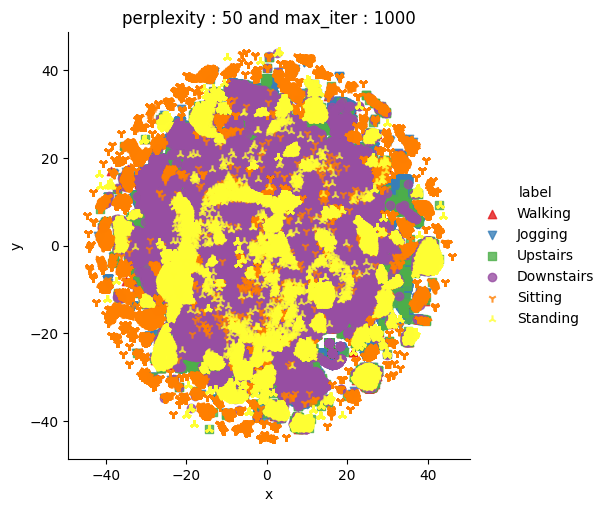

Done


In [ ]:
perform_tsne(X_data = X_col,y_data=y_col, perplexities =[2,5,10,20,50])

# Entrega 4 - MODELO

In [ ]:
from sklearn.svm import SVC #utilizar SVM
from sklearn import metrics #para comprobar la precisión del modelo
from sklearn.metrics import classification_report, confusion_matrix, precision_score
from sklearn.model_selection import train_test_split #dividir en conjunto de entrenamiento y prueba.
from sklearn.ensemble import RandomForestClassifier #utilizar Random Forest
from sklearn import datasets #importar conjunto de datos
import xgboost as xgb #utilizar xgboost
from sklearn.multiclass import OneVsRestClassifier

In [ ]:
#separate x and y in train and test
X_train, X_test, y_train, y_test = train_test_split(X_col, y_col, test_size=0.3, random_state=0)

print("Tamaño de los datos de train: ", len(X_train))
print("Tamaño de los datos de test: ", len(X_test))

Tamaño de los datos de train:  203254
Tamaño de los datos de test:  87110


In [ ]:
#print shape of train and test
print("Tamaño de los datos de train: ", X_train.shape)
print("Tamaño de los datos de test: ", X_test.shape)
print("tamaño de los datos de train: ", y_train.shape)
print("tamaño de los datos de test: ", y_test.shape)


Tamaño de los datos de train:  (203254, 3)
Tamaño de los datos de test:  (87110, 3)
tamaño de los datos de train:  (203254,)
tamaño de los datos de test:  (87110,)


## SVM

In [ ]:
#implement SVM
SVM = SVC(kernel='rbf', C=1) # Linear Kernel
SVM.fit(X_train, y_train)



SVC(C=1)

In [ ]:
#predict test set
y_pred_svm = SVM.predict(X_test)

In [ ]:
#classification report, confusion matrix, accuracy
svm_clas_report = classification_report(y_test, y_pred_svm)
svm_conf_matrix = confusion_matrix(y_test, y_pred_svm)
svm_accuracy = metrics.accuracy_score(y_test, y_pred_svm)
#svm_auc = metrics.roc_auc_score(y_test, y_pred_svm, multi_class='ovr')
print("Classification report for SVM: \n", svm_clas_report)
print("Confusion matrix for SVM: \n", svm_conf_matrix)
print("Accuracy for SVM: ", svm_conf_matrix)
#print("AUC for SVM: ", svm_auc)


Classification report for SVM: 
               precision    recall  f1-score   support

           0       0.47      0.40      0.43     14513
           1       0.75      0.73      0.74     14456
           2       0.96      0.94      0.95     14436
           3       0.62      0.99      0.76     14606
           4       0.43      0.16      0.24     14563
           5       0.47      0.57      0.51     14536

    accuracy                           0.63     87110
   macro avg       0.62      0.63      0.61     87110
weighted avg       0.62      0.63      0.61     87110

Confusion matrix for SVM: 
 [[ 5802  1133    92  2519  1450  3517]
 [  900 10560   306   192   441  2057]
 [   41    19 13567   775    24    10]
 [   68    12     0 14459    44    23]
 [ 3347  1364   165  3432  2391  3864]
 [ 2115   899    74  1856  1270  8322]]
Accuracy for SVM:  [[ 5802  1133    92  2519  1450  3517]
 [  900 10560   306   192   441  2057]
 [   41    19 13567   775    24    10]
 [   68    12     0 14459

## Random Forest

Random forest es un algoritmo que se usa para problemas de regresion y clasificacion usando multiples decision trees para hacer las predicciones.

Esto se realiza entrenando multiples decision trees en distintos subsets de los datos y luego realizar un promedio de todas la prediciones realizadas para obtener la preddicion final, de esta manera se reduce el overfitting, lo hace mas robusto y puede incrementar el rendimiento

Se entrena el modelo con los siguientes parametros:

* n_estimators: numero de estimadores. Por las pequeñas pruebas que se realizaron, entre mayor el numero, se obtiene un mejor accuracy,

* criterion: el criterio que se usara para entrenar el modelo. Esta disponible: gini, entropy y log_loss. Para este caso se uso gini ya que dio los mejores resultados.


In [ ]:
#implement Random Forest
RF = RandomForestClassifier(n_estimators=200,n_jobs=-1, criterion='gini')
RF.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, n_jobs=-1)

In [ ]:
#predict test set
y_pred_rf = RF.predict(X_test)

In [ ]:
#classification report, confusion matrix, accuracy
rf_clas_report = classification_report(y_test, y_pred_rf)
rf_conf_matrix = confusion_matrix(y_test, y_pred_rf)
rf_accuracy = metrics.accuracy_score(y_test, y_pred_rf)
#rf_auc = metrics.roc_auc_score(y_test, y_pred_rf, multi_class='ovr')
print("Classification report for Random Forest: \n", rf_clas_report)
print("Confusion matrix for Random Forest: \n", rf_conf_matrix)
#print("Accuracy for Random Forest: ", rf_accuracy)

Classification report for Random Forest: 
               precision    recall  f1-score   support

           0       0.47      0.46      0.47     14513
           1       0.78      0.79      0.79     14456
           2       0.99      0.98      0.98     14436
           3       0.89      0.94      0.91     14606
           4       0.45      0.39      0.42     14563
           5       0.52      0.56      0.54     14536

    accuracy                           0.69     87110
   macro avg       0.68      0.69      0.69     87110
weighted avg       0.68      0.69      0.68     87110

Confusion matrix for Random Forest: 
 [[ 6691   997    32   547  3314  2932]
 [  893 11465    39    38   721  1300]
 [   62    48 14154    63    84    25]
 [  283    17    24 13660   468   154]
 [ 3744  1171    49   811  5745  3043]
 [ 2512  1013    15   306  2478  8212]]


## XGBoost

XGboost tiene muchas similaridades con random forest ya que ambos trabajan con multiples decision trees.

Una gran diferencia es que XGboost entrena los arboles de manera secuencial, en donde cada arbol es entrenado para corregir los errores del arbol anterior combinando la predicciones de todos los arboles para obtener la prediccion final.

Para empezar a implementar XGBoost es necesario cambiar el tipo de dato de la columna que contiene las etiquetas ya que XGBoost no acepta strings.

Para esto se a va utilizar labelencoder para transformar las etiquetas de train y test a un valor numerico



In [ ]:
#conver y_train using label encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)


Luego se van a crear DMatrix para los datos de train y test.

Esto se realiza ya que DMatrix es una estructura de datos optimizada para la eficiencia de memoria y la velocidad de entrenamiento de XGBoost

In [ ]:
#create DMatrix to make XGBoost more efficient
xgb_train = xgb.DMatrix(X_train, label=y_train)
xgb_test = xgb.DMatrix(X_test, label=y_test)


Los parametros que se van a utilizar son lo siguientes:
* objective: determina el tipo de funcion objetivo que el modelo usara cuando se entrena. Este parametro depende del tipo de problema que se esta abordando, por ejemplo, reg:linear para regresion, binary:logistic para problemas binarios y para este caso multi:softmax para problemas de multiclases.

* eta: es el ritmo de aprendizaje, este valor va desde 0 a 1 y indica que tan rapido va a aprender el modelo. Entre mas bajo el valor se demorara mas con el beneficio de tener una menor chance de overfitting

* max_depth: Como XGBoost es un modelo basado en arboles, este parametro indica la profundidad maxima de cada arbol (valor por defecto = 6). Se puede asumir que a mayor profundidad mejor resultado a costa de uso de memoria

* num_class: Como se va a ocupar multi:softmax, este necesita como parametro de entrada la cantidad de clases que tiene este problema.


In [ ]:
#parameters for xgboost
params = {}
params['objective'] = 'multi:softmax' #multiclass classification using the softmax objective
params['eta'] = 0.3 #learning rate
params['max_depth'] = 20 #maximum depth of a tree
params['nthread'] = 4 #number of cores used
params['num_class'] = 6 #number of classes

num_rounds = 40 #number of rounds for boosting

Se entrena XGBoost tomando los parametros, DMatrix de entrenamiento creada anteriormente y el numero de rondas que se utilizaran  

In [ ]:
#implement XGBoost
XGB = xgb.train(params, xgb_train, num_rounds)


Se realizan las predicciones usando DMatrix con los datos de test

In [ ]:
#predict test set
y_pred_xgb = XGB.predict(xgb_test)


In [ ]:
#classification report, confusion matrix, accuracy
xgb_clas_report = classification_report(y_test, y_pred_xgb,target_names=le.inverse_transform(range(6)))
xgb_conf_matrix = confusion_matrix(y_test, y_pred_xgb)
xgb_accuracy = metrics.accuracy_score(y_test, y_pred_xgb)
#xgb_auc = metrics.roc_auc_score(y_test, y_pred_xgb)
print("Classification report for XGBoost: \n", xgb_clas_report)
print("Confusion matrix for XGBoost: \n", xgb_conf_matrix)
print("Accuracy for XGBoost: ", xgb_accuracy)


Classification report for XGBoost: 
               precision    recall  f1-score   support

  Downstairs       0.47      0.46      0.46     14513
     Jogging       0.79      0.78      0.78     14456
     Sitting       0.99      0.98      0.99     14436
    Standing       0.90      0.94      0.92     14606
    Upstairs       0.44      0.40      0.42     14563
     Walking       0.52      0.56      0.54     14536

    accuracy                           0.69     87110
   macro avg       0.68      0.69      0.68     87110
weighted avg       0.68      0.69      0.68     87110

Confusion matrix for XGBoost: 
 [[ 6610   942    31   454  3501  2975]
 [  944 11205    35    29   871  1372]
 [   60    45 14159    64    83    25]
 [  249     9    21 13771   426   130]
 [ 3769  1083    46   693  5853  3119]
 [ 2514   967    10   250  2609  8186]]
Accuracy for XGBoost:  0.6863046722534726


In [ ]:
#table to compare the accuracy, precision, recall and f1-score, AUC of the models
from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ["Model", "Accuracy", "Precision", "Recall", "F1-Score"]
x.add_row(["SVM", svm_accuracy, svm_clas_report.split()[39], svm_clas_report.split()[40], svm_clas_report.split()[41]])
x.add_row(["Random Forest", rf_accuracy, rf_clas_report.split()[39], rf_clas_report.split()[40], rf_clas_report.split()[41]])
x.add_row(["XGBoost", xgb_accuracy, xgb_clas_report.split()[39], xgb_clas_report.split()[40], xgb_clas_report.split()[41]])
x

Model,Accuracy,Precision,Recall,F1-Score
SVM,0.6325450579726782,0.62,0.63,0.61
Random Forest,0.687946274824934,0.68,0.69,0.69
XGBoost,0.6863046722534726,0.68,0.69,0.68
